# Controlling the page layout

```{warning}
Many of the features on this page are experimental, and may change.
```

There are a few ways to control the layout of a page with Jupyter Book. Many of these
ideas take inspiration from the [Edward Tufte layout CSS guide](https://edwardtufte.github.io/tufte-css/).

Let's begin with a sample plot. You can click the toggle button to the right
to see the code that generated it.

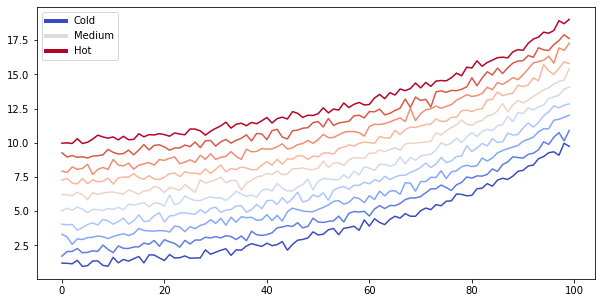

In [6]:
def make_fig(figsize):
    from matplotlib import rcParams, cycler
    import matplotlib.pyplot as plt
    import numpy as np
    plt.ion()

    # Fixing random state for reproducibility
    np.random.seed(19680801)

    N = 10
    data = [np.logspace(0, 1, 100) + .2 * np.random.randn(100) + ii for ii in range(N)]
    data = np.array(data).T
    cmap = plt.cm.coolwarm
    rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                    Line2D([0], [0], color=cmap(.5), lw=4),
                    Line2D([0], [0], color=cmap(1.), lw=4)]

    fig, ax = plt.subplots(figsize=figsize)
    lines = ax.plot(data)
    ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])
make_fig(figsize=(10, 5))

(layout/sidebar)=
## Sidebar content

Adding sidebar content allows you to provide contextual information that doesn't break
up the flow of your main content. It is one of the main patterns recommended in the
[Tufte style guide](https://edwardtufte.github.io/tufte-css/). You can control
sidebar content for either blocks of markdown, or for code cells and their outputs.

```{note}
Sidebar content behaves differently depending on the screen size. If the screen is narrow
enough, the sidebar content will exist in-line with your content. Make the screen
wider and it'll pop out to the right.
```

### Sidebars with MyST markdown

To add sidebar content within a markdown cell, use this syntax:

````
```{sidebar} **My sidebar title**
My sidebar content
```
````

`````{sidebar} **For example**
Here's some sidebar content! It was created by using the
````
```{sidebar}
```
````
directive in a markdown cell. Jupyter Book automatically converts these
cells into helpful side content.
`````

Controlling sidebar content with code cells uses a slightly different pattern,
which we'll cover below.

### Sidebars with code cells

You can make a code cell move to the right sidebar by adding `sidebar` to your
cell's tags. Here's what the cell metadata for a sidebar cell looks like:

```json
{
    "tags": [
        "sidebar",
    ]
}
```

For example, we'll re-display the figure above, and add a `sidebar` tag to the code cell.

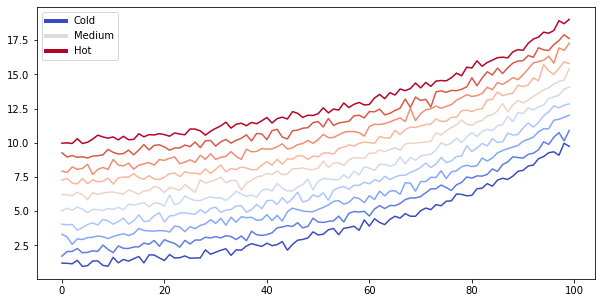

In [7]:
make_fig(figsize=(10, 5))

This can be combined with other tags like `remove_input` to **only display the figure**.

## Hide your markdown with toggle buttons

Sometimes you'd like to initially hide content, and give readers the option
of clicking in order to read. You can activate this behavior in markdown with the `{toggle}`
directive like so:

````
```{toggle}
This content will be toggled!
```
````

This results in:

```{toggle}
This content will be toggled!
```

You can also include a title with your toggle section. The title will always be displayed,
and the toggle button will reveal the section's content. Use this like so:

````
```{toggle} Click the button to reveal!
Some hidden toggle content!

![](../images/cool.jpg)
```
````

This results in:

```{toggle} Click the button to reveal!
Some hidden toggle content!

![](../images/cool.jpg)
```

## Scrolling cell outputs

The traditional Jupyter Notebook interface allows you to toggle **output scrolling**
for your cells. This allows you to visualize part of a long output without it taking up
the entire page.

You can trigger this behavior in Jupyter Book by adding the following
tag to a cell's metadata:


```json
{
    "tags": [
        "output_scroll",
    ]
}
```

For example, the following cell has a long output, but will be scrollable in the book.

In [4]:
for ii in range(40):
    print(f"this is output line {ii}")

this is output line 0
this is output line 1
this is output line 2
this is output line 3
this is output line 4
this is output line 5
this is output line 6
this is output line 7
this is output line 8
this is output line 9
this is output line 10
this is output line 11
this is output line 12
this is output line 13
this is output line 14
this is output line 15
this is output line 16
this is output line 17
this is output line 18
this is output line 19
this is output line 20
this is output line 21
this is output line 22
this is output line 23
this is output line 24
this is output line 25
this is output line 26
this is output line 27
this is output line 28
this is output line 29
this is output line 30
this is output line 31
this is output line 32
this is output line 33
this is output line 34
this is output line 35
this is output line 36
this is output line 37
this is output line 38
this is output line 39


## Wide-format content

Sometimes, you'd like to use **all** of the horizontal space available to you. This allows
you to highlight particular ideas, visualizations, etc.

In Jupyter Book, you can specify that the outputs of a cell (if it's a code cell) or the entire
cell (if it's a markdown cell) should take up all of
the horizonal space (including the sidebar where popouts normally live) using the
following cell metadata tag:

```json
{
    "tags": [
        "full_width",
    ]
}
```

This works equally well on markdown cells, or with code cells.

For example, let's take a look at the figure at full-width. We'll tell Matplotlib
to make it a bit wider so we can take advantage of the extra space!

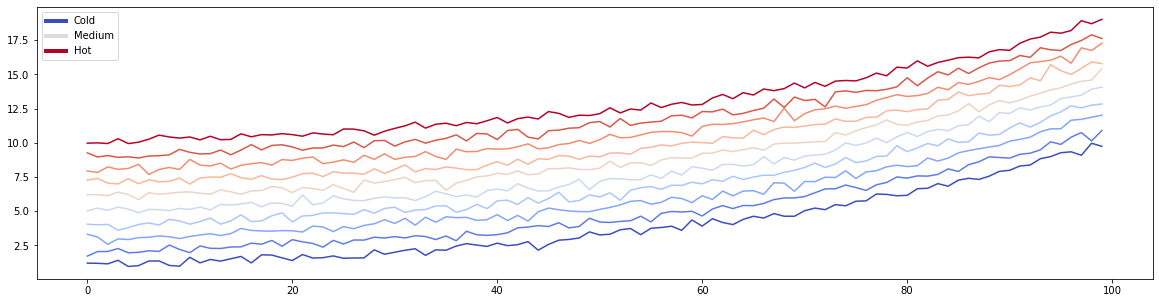

In [8]:
make_fig(figsize=(20, 5))

This can work with markdown cells as well. For example, we'll make the following warning block full-width so that
it draws more attention:

```{admonition} **Be careful about mixing popouts and full-width content**.
:class: full_width

Sometimes these can conflict
with one another in visual space. You should use them relatively sparingly in order
for them to have their full effect of highlighting information.
```